Successfully loaded dataset for EDA.

Dropped 18 pre-identified columns.

Analyzing remaining 51 features.

--- Step 1: Descriptive Statistics ---
          f_phasing  altitude_plane_1_km  inclination_plane_1_deg  \
count  14300.000000         14300.000000             14300.000000   
mean       1.502797           550.024193                62.316804   
std        1.120382           144.224911                20.732188   
min        0.000000           300.020000                25.000000   
25%        0.000000           424.587500                44.830000   
50%        2.000000           550.990000                62.790000   
75%        3.000000           673.770000                80.142500   
max        3.000000           799.890000                98.000000   

       high_q_plane_1  med_q_plane_1  low_q_plane_1  altitude_plane_2_km  \
count    14300.000000   14300.000000   14300.000000         14300.000000   
mean         3.236154       3.176154       4.671888           552.897629   
std

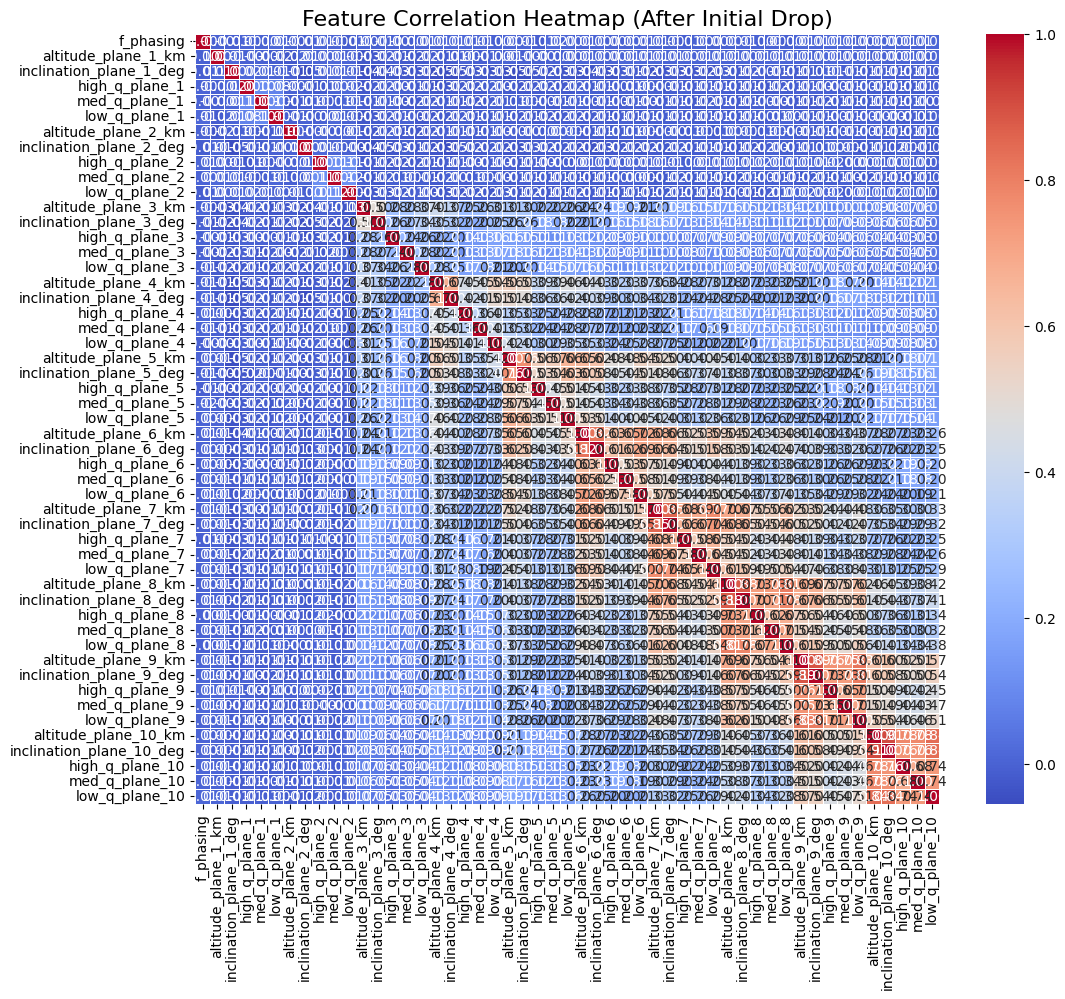


--- Step 3: Variance Inflation Factor (VIF) ---

Interpreting VIF Scores:
  VIF = 1: No correlation
  1 < VIF < 5: Moderate correlation
  VIF > 5 or 10: High correlation (potential multicollinearity)
                     feature       VIF
1                  f_phasing  1.002991
2        altitude_plane_1_km  1.003944
3    inclination_plane_1_deg  1.010167
4             high_q_plane_1  1.019478
5              med_q_plane_1  1.021534
6              low_q_plane_1  1.017259
7        altitude_plane_2_km  1.004021
8    inclination_plane_2_deg  1.010239
9             high_q_plane_2  1.025651
10             med_q_plane_2  1.027498
11             low_q_plane_2  1.029680
12       altitude_plane_3_km  1.575080
13   inclination_plane_3_deg  1.455050
14            high_q_plane_3  1.165767
15             med_q_plane_3  1.180701
16             low_q_plane_3  1.278571
17       altitude_plane_4_km  2.438459
18   inclination_plane_4_deg  2.093659
19            high_q_plane_4  1.384150
20             med_

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# For VIF calculation, we may need to add a constant to our features matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# --- 1. Load Data ---
try:
    df = pd.read_csv('constellation_training_data.csv')
    print("Successfully loaded dataset for EDA.")
except FileNotFoundError:
    print("Error: 'constellation_training_data.csv' not found. Using dummy data.")
    dummy_cols_to_drop = ['total_sats','num_planes', 'sats_plane_1', 'sats_plane_2', 'sats_plane_3', 'sats_plane_4', 'sats_plane_5', 'sats_plane_6', 'sats_plane_7', 'sats_plane_8', 'sats_plane_9', 'sats_plane_10', 'num_high_quality', 'num_medium_quality', 'num_low_quality', 'total_mass_kg', 'hardware_cost_usd', 'launch_cost_usd']
    dummy_target_cols = ['mean_revisit_time_hr', 'total_system_cost_usd', 'mean_achieved_quality']
    all_dummy_cols = [f'feature_{i}' for i in range(4)] + dummy_cols_to_drop + dummy_target_cols
    df = pd.DataFrame(np.random.rand(100, len(all_dummy_cols)), columns=all_dummy_cols)

# --- 2. NEW: Remove Pre-identified Redundant Features ---
# Based on your analysis, we're dropping these columns at the outset.
columns_to_drop = [
    'total_sats','num_planes',
    'sats_plane_1', 'sats_plane_2', 'sats_plane_3', 'sats_plane_4',
    'sats_plane_5', 'sats_plane_6', 'sats_plane_7', 'sats_plane_8',
    'sats_plane_9', 'sats_plane_10', 'num_high_quality',
    'num_medium_quality', 'num_low_quality', 'total_mass_kg',
    'hardware_cost_usd', 'launch_cost_usd'
]
# We use errors='ignore' so the code won't break if a column name is not found.
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')
df_cleaned = df_cleaned[df_cleaned['mean_revisit_time_hr'] != -1]
print(f"\nDropped {len(df.columns) - len(df_cleaned.columns)} pre-identified columns.")


# --- 3. Isolate Remaining Features for Analysis ---
# Define the target columns to separate them from the features.
target_columns = ['mean_revisit_time_hr', 'total_system_cost_usd', 'mean_achieved_quality']

if all(col in df_cleaned.columns for col in target_columns):
    X_features = df_cleaned.drop(columns=target_columns)
else:
    print("Warning: Target columns not found, inferring features from non-target columns.")
    X_features = df_cleaned.iloc[:, :-3] # Fallback

print(f"\nAnalyzing remaining {len(X_features.columns)} features.")


# --- 4. Descriptive Statistics ---
print("\n--- Step 1: Descriptive Statistics ---")
print(X_features.describe())

# --- 5. Visual Correlation Analysis (Heatmap) ---
print("\n--- Step 2: Correlation Matrix Heatmap ---")
# Calculate the correlation matrix for the remaining features.
corr_matrix = X_features.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Feature Correlation Heatmap (After Initial Drop)', fontsize=16)
plt.show()


# --- 6. Quantitative Analysis (VIF) ---
print("\n--- Step 3: Variance Inflation Factor (VIF) ---")
# VIF is calculated on the remaining features to check for any residual multicollinearity.
if not X_features.empty:
    X_vif = add_constant(X_features)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X_vif.columns
    vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
    
    print("\nInterpreting VIF Scores:")
    print("  VIF = 1: No correlation")
    print("  1 < VIF < 5: Moderate correlation")
    print("  VIF > 5 or 10: High correlation (potential multicollinearity)")
    # We print the VIF scores for the features, ignoring the constant term.
    print(vif_data.iloc[1:])
else:
    print("No features left to analyze for VIF.")



In [4]:
df_cleaned.to_csv('constellation_training_data_cleaned.csv',index=False)